In [2]:
import numpy as np
import os
np.set_printoptions(threshold=np.inf, precision=2)
import matplotlib.pyplot as plt

from skimage.transform import resize, pyramid_reduce
import sys
import time

from skimage import io

In [3]:
def show_images(images, cols = 1, titles = None):
    """Display a list of images in a single figure with matplotlib.
    
    Parameters
    ---------
    images: List of np.arrays compatible with plt.imshow.
    
    cols (Default = 1): Number of columns in figure (number of rows is 
                        set to np.ceil(n_images/float(cols))).
    
    titles: List of titles corresponding to each image. Must have
            the same length as titles.
    """
    assert((titles is None)or (len(images) == len(titles)))
    n_images = len(images)
    if titles is None: titles = ['Image (%d)' % i for i in range(1,n_images + 1)]
    fig = plt.figure()
    for n, (image, title) in enumerate(zip(images, titles)):
        a = fig.add_subplot(cols, np.ceil(n_images/float(cols)), n + 1)
#         if image.ndim == 2:
#             plt.gray()
#         plt.imshow(images[-1])
        plt.imshow(image, cmap=plt.get_cmap('gray'), alpha=1.0)
#         plt.colorbar()
        a.set_title(title)
    fig.set_size_inches(np.array(fig.get_size_inches()) * n_images)
#     print('np.array(fig.get_size_inches()) * n_images', np.array(fig.get_size_inches()) * n_images)
#     fig.set_size_inches([246, 164])
    plt.show()
    

# def show_subplots(n_subplots)
    

tx_imgs len and [0] 21 164_240x320_transformed.npy
test_image_file_path /s/red/b/nobackup/data/eggnog_cpm/eggnog_cpm_test/transformed/r10/377_240x320_transformed.npy
img_batch.shape (5, 240, 320, 3)
original transformed rgb image = 


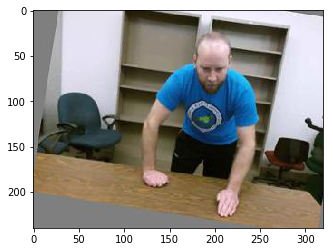

In [14]:
## list directory of output transformed images
transformed_dir = "/s/red/b/nobackup/data/eggnog_cpm/eggnog_cpm_test/transformed/r10/"
# "/s/red/b/nobackup/data/eggnog_cpm/eggnog_cpm/s11/part2_layout_p21/20151208_202800_00_Video_augmented/" 

tx_imgs = [im for im in sorted(os.listdir(transformed_dir)) if im.endswith('240x320_transformed.npy')]
print("tx_imgs len and [0]", len(tx_imgs), tx_imgs[0])

image_idx = 9
slice_idx = 4

test_image_file_path = os.path.join(transformed_dir, tx_imgs[image_idx])
print("test_image_file_path", test_image_file_path)

img_batch = np.load(test_image_file_path)
print("img_batch.shape", img_batch.shape)  # (5, 240, 320, 3)


original_image = img_batch[slice_idx, :, :, :]
rgb_image = original_image   # [:,:,[2,1,0]]  use this when image is loaded with cv2
down_image = pyramid_reduce(rgb_image, downscale=8)

rgb_image_center_crop = rgb_image[100:140,140:180,:]
# print("rgb image", rgb_image_center_crop)

print("original transformed rgb image = ")
plt.figure(0)
plt.imshow(rgb_image)
plt.show()


# print("center crop rgb image = ")
# plt.figure(0)
# plt.imshow(rgb_image_center_crop)
# plt.show()



/s/red/b/nobackup/data/eggnog_cpm/eggnog_cpm_test/transformed/r10/377_heatmap30x40_transformed.npy
batch heatmap shape (5, 30, 40, 11)
heatmap test for seq


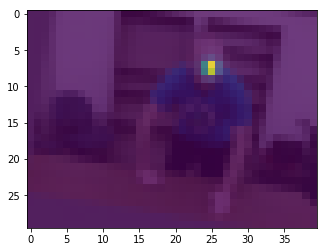

heatmap test for seq


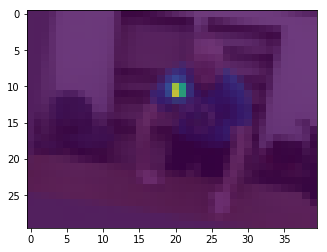

heatmap test for seq


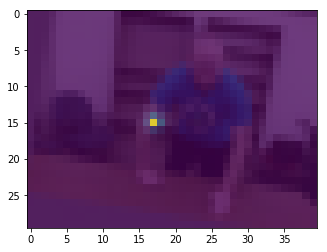

heatmap test for seq


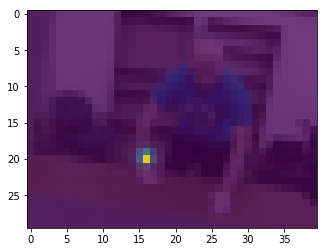

heatmap test for seq


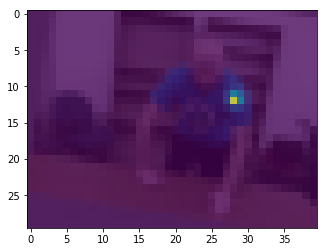

heatmap test for seq


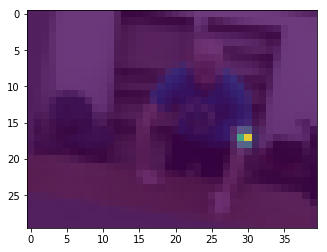

heatmap test for seq


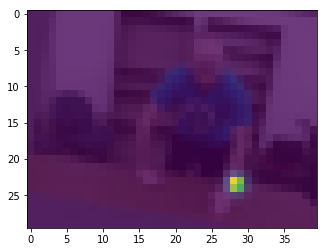

heatmap test for seq


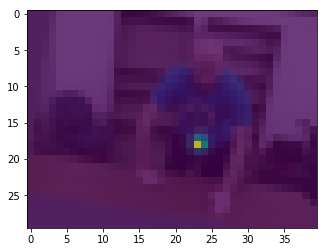

heatmap test for seq


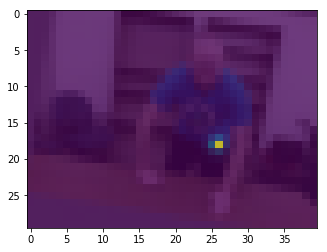

heatmap test for seq


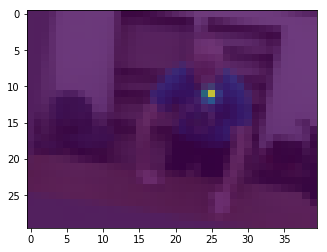

heatmap test for seq


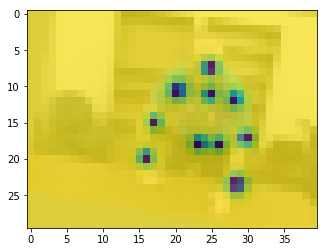

gt_heatmap [[1.   1.   1.   1.   1.   1.   1.   1.   1.   1.   1.   1.   1.   1.
  1.   1.   1.   1.   1.   1.   1.   1.   1.   1.   1.   1.   1.   1.
  1.   1.   1.   1.   1.   1.   1.   1.   1.   1.   1.   1.  ]
 [1.   1.   1.   1.   1.   1.   1.   1.   1.   1.   1.   1.   1.   1.
  1.   1.   1.   1.   1.   1.   1.   1.   1.   1.   1.   1.   1.   1.
  1.   1.   1.   1.   1.   1.   1.   1.   1.   1.   1.   1.  ]
 [1.   1.   1.   1.   1.   1.   1.   1.   1.   1.   1.   1.   1.   1.
  1.   1.   1.   1.   1.   1.   1.   1.   1.   1.   1.   1.   1.   1.
  1.   1.   1.   1.   1.   1.   1.   1.   1.   1.   1.   1.  ]
 [1.   1.   1.   1.   1.   1.   1.   1.   1.   1.   1.   1.   1.   1.
  1.   1.   1.   1.   1.   1.   1.   1.   1.   1.   1.   1.   1.   1.
  1.   1.   1.   1.   1.   1.   1.   1.   1.   1.   1.   1.  ]
 [1.   1.   1.   1.   1.   1.   1.   1.   1.   1.   1.   1.   1.   1.
  1.   1.   1.   1.   1.   1.   1.   1.   1.   1.   1.   1.   1.   1.
  1.   1.   1.   1.   1.   1.   1.   

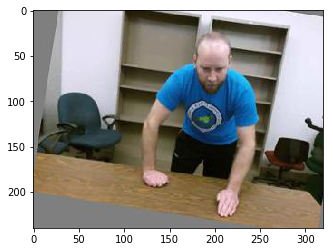

heatmap test


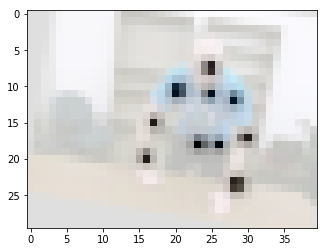

In [15]:
# show heatmaps

test_heatmap_file_path = test_image_file_path.replace("240x320", "heatmap30x40")
print(test_heatmap_file_path)

batch_heatmap = np.load(test_heatmap_file_path)
print("batch heatmap shape", batch_heatmap.shape)  # (5, 30, 40, 11)

test_heatmap = batch_heatmap[slice_idx, :, :, :]
gt_heatmap = test_heatmap


images = []  # a list containing alternated test_hm and gt_hm
titles = []  # titles for images above
len_hm = test_heatmap.shape[2]


# for i in range(test_heatmap.shape[2]):
#     #2 faster
#     images.append(gt_heatmap[:,:,i])  #
#     images.append(test_heatmap[:,:,i])  #
#     images.append(rgb_image)

#     titles.append('GT_' + str(i))
#     titles.append('TEST_' + str(i))
#     titles.append('rgb image')

#     show_images(images, 1, titles)
#     images = []
#     titles = []

for i in range(test_heatmap.shape[2]):
    print("heatmap test for seq")
    plt.figure()
    plt.imshow(gt_heatmap[:,:,i])
    plt.imshow(down_image, alpha=0.25)
    plt.show()

# background hm
print("gt_heatmap", gt_heatmap[:,:,-1])

bk_hm = test_heatmap[:,:,len_hm-1]
print("bk_hm shape", bk_hm.shape)

print("RGB image")
plt.figure(2)
plt.imshow(rgb_image, alpha=1)
plt.show()

print("heatmap test")
plt.figure(5)
plt.imshow(bk_hm, cmap=plt.get_cmap('gray'))
plt.imshow(down_image, alpha=0.25)
plt.show()
    



/s/red/b/nobackup/data/eggnog_cpm/eggnog_cpm_test/transformed/r10/377_paf30x40_transformed.npy
test paf shape (5, 30, 40, 12)
RGB image


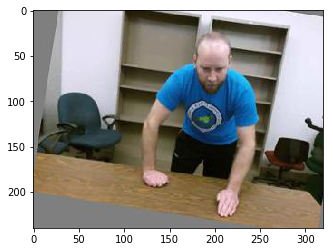

paf test


TypeError: Invalid dimensions for image data

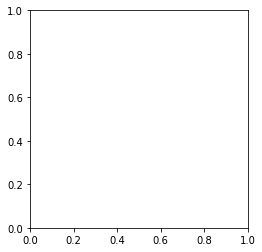

In [16]:
# show pafs

test_paf_file_path = test_image_file_path.replace("240x320", "paf30x40")
print(test_paf_file_path)
gt_paf_file_path = test_paf_file_path

test_paf = np.load(test_paf_file_path)
print("test paf shape", test_paf.shape)  # (30, 40, 36)
gt_paf = np.load(gt_paf_file_path)

summed_test_paf = np.sum(test_paf, axis=2)
summed_gt_paf = np.sum(gt_paf, axis=2)
# summed_pafx = np.zeros((paf.shape[0], paf.shape[1]))
# summed_pafy = np.zeros((paf.shape[0], paf.shape[1]))

images = []  # a list containing alternated test_paf and gt_paf
titles = []  # titles for images above

# for i in range(test_paf.shape[2]):
    
#     #2  faster!
#     images.append(gt_paf[:,:,i])
#     images.append(test_paf[:,:,i])
#     images.append(rgb_image)

#     titles.append('GT_' + str(i))
#     titles.append('TEST_' + str(i))
#     titles.append('rgb image')
    
#     show_images(images, 1, titles)
#     images = []
#     titles = []
    
    
    #1  slow!!!
#     images.append(gt_paf[:,:,i])  #
#     images.append(test_paf[:,:,i])  # 
#     titles.append('GT_' + str(i))
#     titles.append('TEST_' + str(i))
#     if i%2 == 0:
#         summed_pafx = summed_pafx + paf[:,:,i]
#     else:
#         summed_pafy = summed_pafy + paf[:,:,i]


# original image
# images.append(rgb_image)
# titles.append('rgb image')
# print("images len", len(images))
# start_t = time.time()
# # show_images(images, 38, titles)
# end_t = time.time()


# print("total time = ", end_t-start_t)
# plt.figure(2)
# plt.imshow(summed_pafx/paf.shape[2]/2, cmap=plt.get_cmap('gray'), vmin=-1, vmax=1)  
# plt.show()

# plt.figure(3)
# plt.imshow(summed_pafy/paf.shape[2]/2, cmap=plt.get_cmap('gray'), vmin=-1, vmax=1)  
# plt.show()

print("RGB image")
plt.figure(2)
plt.imshow(rgb_image, alpha=1)
plt.show()

print("paf test")
plt.figure(4)
plt.imshow(summed_test_paf, cmap=plt.get_cmap('gray'))
plt.imshow(down_image, alpha=0.15)
plt.show()

# print("paf gt")
# plt.figure(5)
# plt.imshow(summed_gt_paf, cmap=plt.get_cmap('gray'))  
# plt.show()

paf_pairs_indices = [[1, 14], [0, 1], [12, 0], [13, 0], 
                    [4, 14], [5, 4], [6, 5], [7, 6], [15, 7], [16, 6],
                    [8, 14], [9, 8], [10, 9], [11, 10], [17, 11], [18, 10],
                    [14, 2], [2, 3]
                    ]


